In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [36]:
truck_reward = []
factory_reward = []
result = []
folder_path = './result/maddpg'

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)

        # Read the CSV file without the header row
        data = np.genfromtxt(file_path, delimiter=',', skip_header=1, dtype=None, encoding=None)
        
        if 'truck' in file_path:
            truck_reward.append(data)
        elif 'Factory' in file_path:
            factory_reward.append(data)
        else:
            result = data


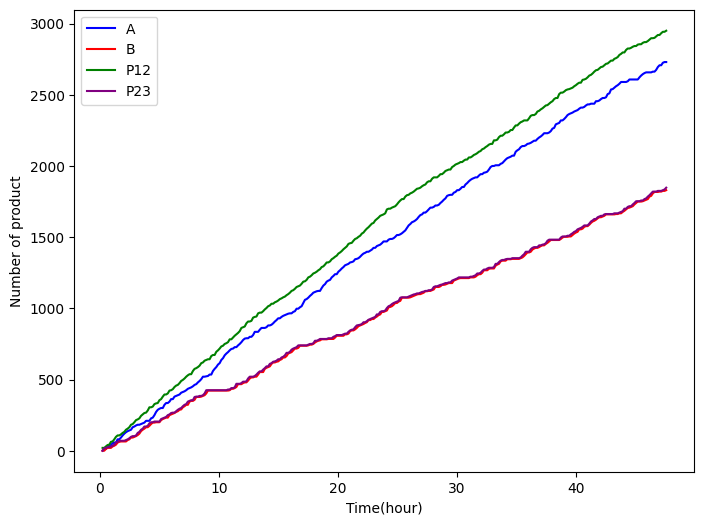

In [59]:
# plot the result
# Create the plot with different colors for each series
threshold = 0.5

plt.figure(figsize=(8, 6))  # Optional: specify the figure size
plt.plot(result[:,0], result[:,1], label='A', color='blue')
plt.plot(result[:,0], result[:,2], label='B', color='red')
plt.plot(result[:,0], result[:,3], label='P12', color='green')
plt.plot(result[:,0], result[:,4], label='P23', color='purple')

# Add labels and legend
plt.xlabel('Time(hour)')
plt.ylabel('Number of product')
plt.legend()

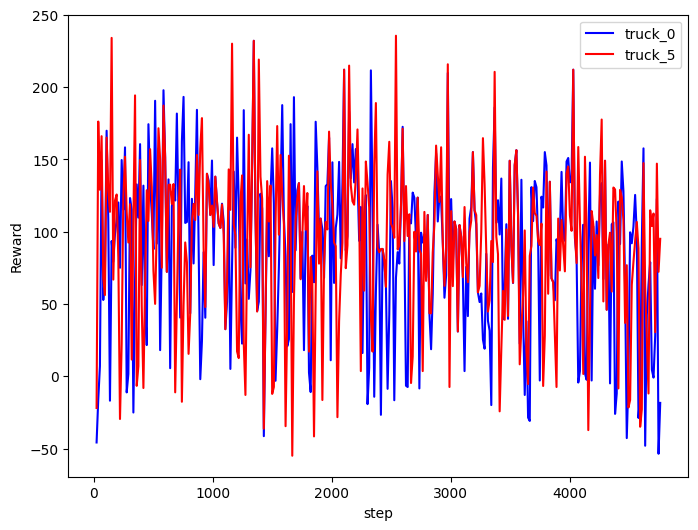

In [65]:
# plot the truck reward
# Create the plot with different colors for each series
plt.figure(figsize=(8, 6))  # Optional: specify the figure size
plt.plot(truck_reward[0][:,0]*100, truck_reward[0][:,1], label='truck_0', color='blue')
plt.plot(truck_reward[5][:,0]*100, truck_reward[5][:,1], label='truck_5', color='red')
# plt.plot(truck_reward[2][:,0], truck_reward[2][:,1], label='truck_2', color='green')
# plt.plot(truck_reward[3][:,0], truck_reward[3][:,1], label='truck_3', color='purple')

# Add labels and legend
plt.xlabel('step')
plt.ylabel('Reward')
plt.legend()

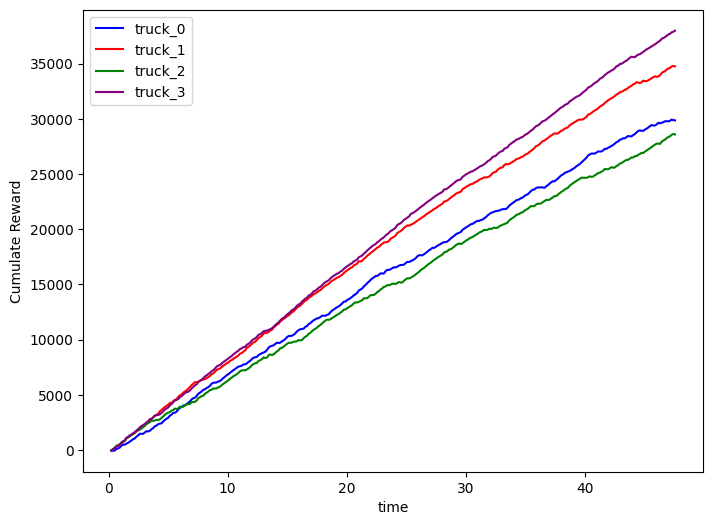

In [51]:
# plot the truck reward
# Create the plot with different colors for each series
plt.figure(figsize=(8, 6))  # Optional: specify the figure size
plt.plot(truck_reward[0][:,0], truck_reward[0][:,2], label='truck_0', color='blue')
plt.plot(truck_reward[1][:,0], truck_reward[1][:,2], label='truck_1', color='red')
plt.plot(truck_reward[2][:,0], truck_reward[2][:,2], label='truck_2', color='green')
plt.plot(truck_reward[3][:,0], truck_reward[3][:,2], label='truck_3', color='purple')

# Add labels and legend
plt.xlabel('time')
plt.ylabel('Cumulative Reward')
plt.legend()

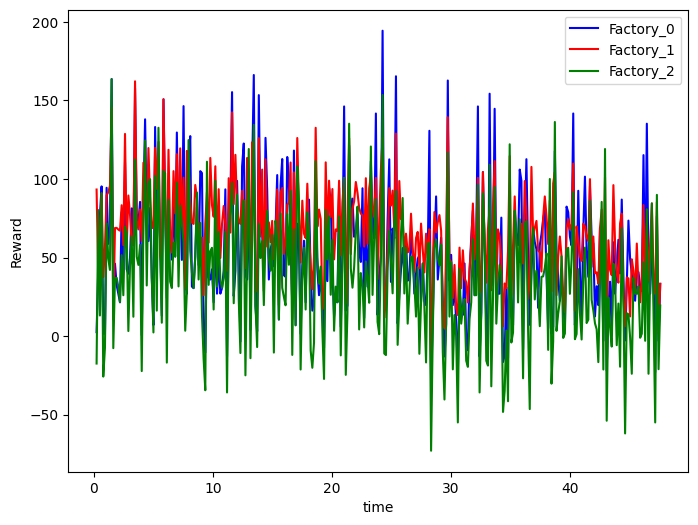

In [55]:
# plot the factory reward
# Create the plot with different colors for each series
plt.figure(figsize=(8, 6))  # Optional: specify the figure size
plt.plot(factory_reward[0][:,0], factory_reward[0][:,1], label='Factory_0', color='blue')
plt.plot(factory_reward[1][:,0], factory_reward[1][:,1], label='Factory_1', color='red')
plt.plot(factory_reward[2][:,0], factory_reward[2][:,1], label='Factory_2', color='green')

# Add labels and legend
plt.xlabel('time')
plt.ylabel('Reward')
plt.legend()

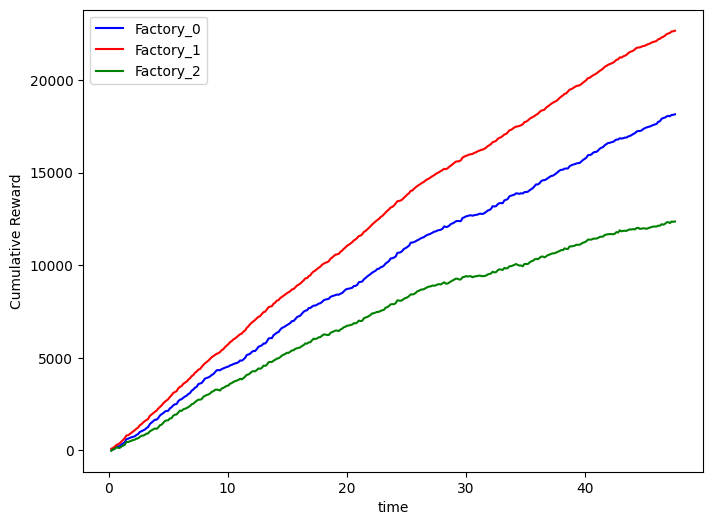

In [56]:
# plot the factory reward
# Create the plot with different colors for each series
plt.figure(figsize=(8, 6))  # Optional: specify the figure size
plt.plot(factory_reward[0][:,0], factory_reward[0][:,2], label='Factory_0', color='blue')
plt.plot(factory_reward[1][:,0], factory_reward[1][:,2], label='Factory_1', color='red')
plt.plot(factory_reward[2][:,0], factory_reward[2][:,2], label='Factory_2', color='green')

# Add labels and legend
plt.xlabel('time')
plt.ylabel('Cumulative Reward')
plt.legend()